> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [2]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [3]:
def corr2d(X: np.array, K: np.array) -> np.array:
    X_height, X_width = X.shape
    K_height, K_width = K.shape
    # no padding for now and assume stride = 1
    out_height = X_height - K_height + 1
    out_width = X_width - K_width + 1

    output = np.zeros((out_height,out_width))
    for i in range(out_height):
        for j in range(out_width):
            output[i, j] = np.sum(X[i:i+K_height, j:j+K_width] * K)

    return output
    pass


In [4]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [5]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
    num_channels = X.shape[0]
    out_height = X.shape[1] - K.shape[1] + 1  
    out_width = X.shape[2] - K.shape[2] + 1
    
    output=np.zeros((out_height,out_width))
    X_new = np.stack(X, axis=0)
    K_new = np.stack(K, axis=0)
    
    for i in range(num_channels):
      output += corr2d(X_new[i], K_new[i])

    return output


In [6]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [7]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)
 num_kernels = K.shape[0]
 out_height = X.shape[1] - K.shape[2] + 1 
 out_width = X.shape[2] - K.shape[3] + 1  
 output = np.zeros((num_kernels, out_height, out_width))

 for i in range(num_kernels):
        output[i] = corr2d_multiple_input_channels(X, K[i])

 return np.stack(output, axis=0)
    

    

In [8]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

Using stride larger than 1 can provide both computational and statistical benefits.
Computational benefits: When the stride is larger than 1, the convolutional operation skips over certain input locations, resulting in fewer computations.

Statistical benefits: Increases receptive field and
enhances ability to capture larger-scale features.

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [9]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [10]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K) 
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [15]:
X = X.reshape((1, 6, 8, 1)) # this will be the input to the model
Y = Y.reshape((1, 6, 7, 1)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(1,(1,2), use_bias=False))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr), loss = 'mse', metrics = ['accuracy'])

epochs = 70
for i in range (epochs):
  model.fit(X, Y , epochs = 1)
  kernel = model.get_weights()[0]
  kernel = np.array(kernel).flatten()
  kernel = kernel.reshape((1,2))
  print("TrainedKernel:", kernel)

1/1 [==============================] - 0s 403ms/step - loss: 0.2836 - accuracy: 0.7143
TrainedKernel: [[0.21056479 0.05369778]]
1/1 [==============================] - 0s 8ms/step - loss: 0.2676 - accuracy: 0.7143
TrainedKernel: [[0.24043496 0.02371379]]
1/1 [==============================] - 0s 8ms/step - loss: 0.2521 - accuracy: 0.7143
TrainedKernel: [[ 0.27006748 -0.00624272]]
1/1 [==============================] - 0s 8ms/step - loss: 0.2371 - accuracy: 0.7143
TrainedKernel: [[ 0.2993367 -0.0361602]]
1/1 [==============================] - 0s 8ms/step - loss: 0.2226 - accuracy: 0.7143
TrainedKernel: [[ 0.32810035 -0.06602597]]
1/1 [==============================] - 0s 8ms/step - loss: 0.2087 - accuracy: 0.7143
TrainedKernel: [[ 0.35620356 -0.09582639]]
1/1 [==============================] - 0s 8ms/step - loss: 0.1954 - accuracy: 0.7143
TrainedKernel: [[ 0.38348562 -0.12554665]]
1/1 [==============================] - 0s 7ms/step - loss: 0.1825 - accuracy: 0.7143
TrainedKernel: [[ 0.409

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [ ]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job
     output_h = X.shape[0] // K[0] + 1 
     output_w = X.shape[1] // K[1] + 1 

     
     output = np.zeros((output_h, output_w))

     
     for i in range(output_h):
        for j in range(output_w):
            output[i, j] = np.max(X[i * K[0]:i * K[0] + K[0], j * K[1]:j * K[1] + K[1]])

     return output


In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4., 5.],
       [7., 8.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


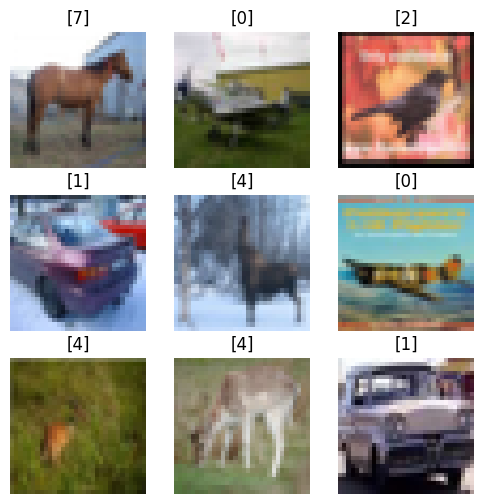

In [ ]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [ ]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

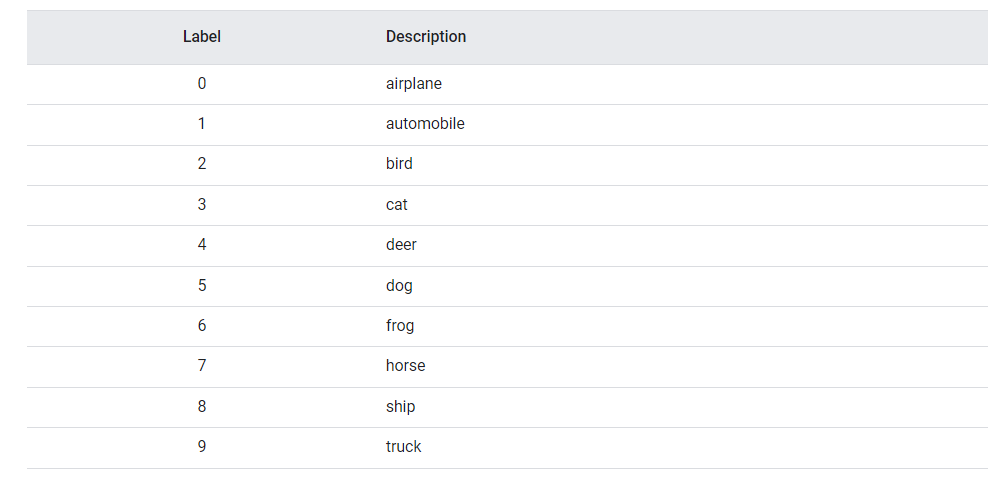

In [ ]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer:
# Adam optimizer is the extended version of stochastic gradient descent which could be implemented in various deep learning applications such as computer vision and natural language processing.
# Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent.
 It requires less memory and is efficient. Intuitively, it is a combination of the 'gradient descent with momentum' algorithm and the 'RMSP' algorithm.
# It maintains separate adaptive learning rate for each parameter which allows it to adjust the learning rate based on the parameters.
# The Adam optimizers inherit the features of both Adagrad and RMS prop algorithms.
In adam, instead of adapting learning rates based upon the first moment(mean) as in RMS Prop, it also uses the second moment of the gradients.

# Adaptive Gradient Algorithm (AdaGrad): that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
Root Mean Square Propagation (RMSProp): that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing).
This means the algorithm does well on online and non-stationary problems (e.g. noisy).



"""
https://towardsdatascience.com/adam-optimization-algorithm-1cdc9b12724a
https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/
Chatgpt

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


875/875 [==============================] - 15s 4ms/step - loss: 2.6435 - accuracy: 0.0974 - val_loss: 2.3014 - val_accuracy: 0.0951
Epoch 2/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3004 - accuracy: 0.1011 - val_loss: 2.2990 - val_accuracy: 0.0980
Epoch 3/10
875/875 [==============================] - 4s 5ms/step - loss: 2.2906 - accuracy: 0.1138 - val_loss: 2.2845 - val_accuracy: 0.1811
Epoch 4/10
875/875 [==============================] - 4s 4ms/step - loss: 2.2999 - accuracy: 0.1072 - val_loss: 2.3026 - val_accuracy: 0.1031
Epoch 5/10
875/875 [==============================] - 3s 4ms/step - loss: 2.2971 - accuracy: 0.1038 - val_loss: 2.3037 - val_accuracy: 0.0979
Epoch 6/10
875/875 [==============================] - 4s 5ms/step - loss: 2.2996 - accuracy: 0.1015 - val_loss: 2.3043 - val_accuracy: 0.0976
Epoch 7/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3005 - accuracy: 0.1019 - val_loss: 2.3056 - val_accuracy: 0.1033
Epoch 8/10
875/8

In [ ]:
""" 
Write about validation accuracy in 100 words.

Answer: 
First let us know what is validation set,
When our model is overfiited we slipt it into two data sets Training dataset and Validation dataset. Here the validation data set is 20%.
While the training set is used to train our model, Validation set is used to check the performance of our model.
Each dataset has loss and accuracy, the accuracy involved with validation dataset is called validation accuracy.
Here our Validation accuracy ranges from 0.0951 - 0.1811, it means that our model would work on new data with an accuracy of ~9.5% - ~18.1%
So it is basically the percentage of accurate prediction our model can make on new dataset. 





"""
source: stackoverflow

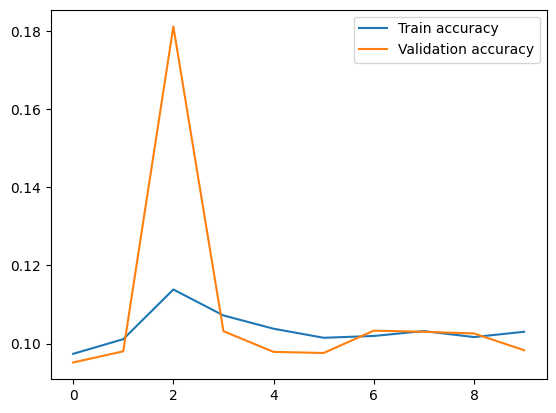

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 6s 4ms/step - loss: 2.2898 - accuracy: 0.2667 - val_loss: 1.7642 - val_accuracy: 0.3650
Epoch 2/20
875/875 [==============================] - 5s 6ms/step - loss: 1.6564 - accuracy: 0.3981 - val_loss: 1.5795 - val_accuracy: 0.4254
Epoch 3/20
875/875 [==============================] - 4s 5ms/step - loss: 1.4960 - accuracy: 0.4582 - val_loss: 1.5316 - val_accuracy: 0.4486
Epoch 4/20
875/875 [==============================] - 4s 4ms/step - loss: 1.3896 - accuracy: 0.5003 - val_loss: 1.4060 - val_accuracy: 0.4971
Epoch 5/20
875/875 [==============================] - 4s 4ms/step - loss: 1.3080 - accuracy: 0.5328 - val_loss: 1.4160 - val_accuracy: 0.4947
Epoch 6/20
875/875 [==============================] - 4s 5ms/step - loss: 1.2357 - accuracy: 0.5623 - val_loss: 1.3228 - val_accuracy: 0.5359
Epoch 7/20
875/875 [==============================] - 3s 4ms/step - loss: 1.1876 - accuracy: 0.5832 - val_loss: 1.3215 - val_accuracy: 0.5439
Epoch 

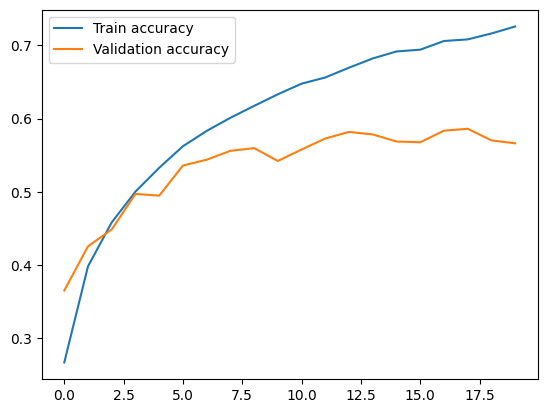

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
Did our model improved??
Are we done with the job?
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.

"""

Here the model is very well trained on training data that it won't work accurately on unseen data, this means our model is overfitted.
Yes, our model has improved as training accuracy is improved, but we are not yet done with the model, it needs more improvement as it still is overfitted.

In [ ]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

In [ ]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

In [ ]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: 
# Underfitting: Underfitting is a situation when our model is too simple for our data.
# For example, when out data is quadratic but our model is linear.
# When the model cannot capture the underlying trend of the data, i.e.,
it only performs well on training data but performs poorly on testing data. 
# It can occur due to different reasons:
1. model complexity: when our model is too basic or has lesser number of parameters.
2. Insufficient training: when our model is not trained with enough data.
3. High bias and low variance.
4. Low training accuracy and test accuracy.

# Overfitting: Overfitting is something opposite to underfitting, that is when our model is too complex.
# For example, when our data is linear and our model is high-degree polynomial.
# Overfitting occurs when a machine learning model performs exceptionally well on the training data but
fails to generalize well to unseen or new data.
# It can occur due to different reasons:
1. when our model is too complex.
2. High variance and low bias. 
3. High training accuracy but low-test accuracy.

"""
https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
https://towardsdatascience.com/overfitting-and-underfitting-principles-ea8964d9c45c#:~:text=Underfitting%20means%20that%20your%20model,val%2Ftest%20error%20is%20large.
https://www.simplilearn.com/tutorials/machine-learning-tutorial/overfitting-and-underfitting

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: 
# First of all, what is regularization, it refers to set of different techniques 
to prevent overfitting and improve the generalization performance of a model.
# It involves adding a penalty term to the loss function during training. 
This term discourages the model from becoming too complex or having large parameter values, 
which helps in controlling the model's ability to fit noise in the training data.
Regularization methods include L1 and L2 regularization, dropout, early stopping, and more.
# In machine learning regularization penalises the coefficients.
# The goal is to find a balance between fitting the training data well and maintaining simplicity and generalizability.
# There are two main types of regularization techniques
1. Ridge regularization:
# Also known as Ridge Regression, it modifies the over-fitted or under fitted models by adding the penalty equivalent to the sum of the squares of the magnitude of coefficients.
      Cost function = Loss + λ x∑‖w‖^2 
      λ ----> penalty
      w ----> slope of curve/ line

2. Lasso regularization:
# It modifies the over-fitted or under-fitted models by adding the penalty equivalent to the sum of the absolute values of coefficients. 
# Lasso regression also performs coefficient minimization, but instead of squaring the magnitudes of the coefficients, it takes the true values of coefficients.
      Cost function = Loss + λ x ∑‖w‖ 
      λ ----> penalty
      w ----> slope of curve/ line




"""
https://www.simplilearn.com/tutorials/machine-learning-tutorial/regularization-in-machine-learning

In [ ]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: 
# Dropout means dropping out a node from neural network.
# All the forward and backwards connections with a dropped node are temporarily removed,
thus, creating a new network architecture out of the parent network. The nodes are dropped by a dropout probability of p.
# For example, if the input layer is {1,2,3,4,5} and dropout probability = 0.2 then dropout randomly drops the value of input,
then it the layer could be {1,2,0,4,5} or {1,2,3,4,0} and so on..
# Generally, the drop probability of input layer is closer to 1, and for hidden layers it is in between 0.2 - 0.5

# Dropout is used to solve the problem of overfitting
Overfitting happens when the neural network becomes too specialized to the training data and doesn't perform well on new, unseen data.
One way this can happen is when individual units in the network start to compensate for mistakes made by other units. 
This creates complex relationships between the units, which are specific to the training data and don't generalize well to new data.

To address this issue, we can use a technique called dropout. 
Dropout works by randomly disabling (or "dropping") a certain number of units (also called nodes) in the network during each training iteration. 
By doing this, we prevent the units from relying too heavily on each other and force them to take more individual responsibility for the input data.


"""

https://towardsdatascience.com/dropout-in-neural-networks-47a162d621d9#:~:text=Dropout%20layers%20have%20been%20the%20go%2Dto%20method%20to%20reduce,modern%20era%20of%20deep%20learning.&text=In%20this%20era%20of%20deep,career%20of%20building%20neural%20networks.

In [ ]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer:
# L1 normalization also known as Manhattan Normalization is a technique used to normalize data in such a way that the sum of absolute values 
of the data becomes 1.
# It is a technique that transforms data into standardized form by dividing each term by sum of absolute values of all the term
 
Let's suppose there is a ser of value {x1, x2, x3..., xn} then
  L1(x1) = |x1| / (|x1|+|x2|+|x3|...+|xn|)

# L1 normalization is particularly useful when dealing with sparse data (a variable in which the cells do not contain actual data within data analysis) or when feature selection is required.
# L1 normalization allows the non-zero elements to retain their original values, while the zero elements become normalized to zero. 
This property helps in reducing the impact of irrelevant or negligible features.
# Also, L1 normalization gives sparse solution which implies most of the values are zero, this helps in the feature selection or dimensionality reduction tasks, 
where it helps in reducing the number of features and improving the efficiency of subsequent algorithms.
# By using L1 normalization, the importance of different features can be compared and interpreted, and irrelevant or negligible features can be effectively handled.

"""
source : chatgpt

In [ ]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: 
# L2 normalization also known as Euclidean Normalization is a technique used to normalize data by dividing each term by square root of sum of squares of each term.
 It ensures that the resulting vector has a magnitude of 1.
# L2 normalization is also commonly used in machine learning algorithms that are sensitive to the scale of features.

# If the data values are {x1, x2, ……, xn} then,
L2(x1) = |x1| / sqrt (x1^2 + x2^2 + …… + xn^2)

# L2 normalization has several advantages and use cases. 
It is particularly useful when the magnitude or scale of the features in a dataset is important. 
By normalizing the data using L2 normalization, the impact of varying magnitudes of features can be minimized, allowing for fair comparisons between them.

"""

source : chatgpt

In [ ]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: 
# Data augmentation is a set of techniques to artificially increase the dataset by modifying the copies of existing data or synthetically generating new copies of the dataset by using the existing dataset. 
While training the machine learning model, it acts as regularization and reduces overfitting.
# Data augmentation is useful to improve the performance and outcomes of machine learning models by forming new and different examples to train datasets.
 If the dataset in a machine learning model is rich and sufficient, the model performs better and more accurately.
# For data augmentation, making simple alterations on visual data is popular. 
In addition, generative adversarial networks (GANs) are used to create new synthetic data. Classic image processing activities for data augmentation are:
padding, random rotating, re-scaling, vertical and horizontal flipping, translation, cropping, zooming etc.,
# Advanced models for data augmentation are
Adversarial training/Adversarial machine learning, Generative adversarial networks (GANs), Neural style transfer, Reinforcement learning.
# They enable the expansion of training datasets, enhance model robustness, prevent overfitting, balance class distributions, and address bias and fairness concerns. 
By introducing variations and realistic perturbations, data augmentation helps models learn more generalized and invariant representations, leading to improved performance on real-world data.
# Disadvantage of data augmentation:
The main disadvantage of data augmentation arises from data bias.
If the original data have biases, the augmented data will also have biases which will lead to suboptimal results.



"""
https://www.mygreatlearning.com/blog/understanding-data-augmentation/#:~:text=Data%20augmentation%20can%20be%20used,imbalance%20problem%20in%20classification%20tasks.